In [49]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [60]:
# Carga los archivos en un DataFrame
steam_games = pd.read_csv('../data/steam_games.csv')
users_items = pd.read_csv('../data/users_items.csv')
users_reviews = pd.read_csv('../data/users_reviews.csv')

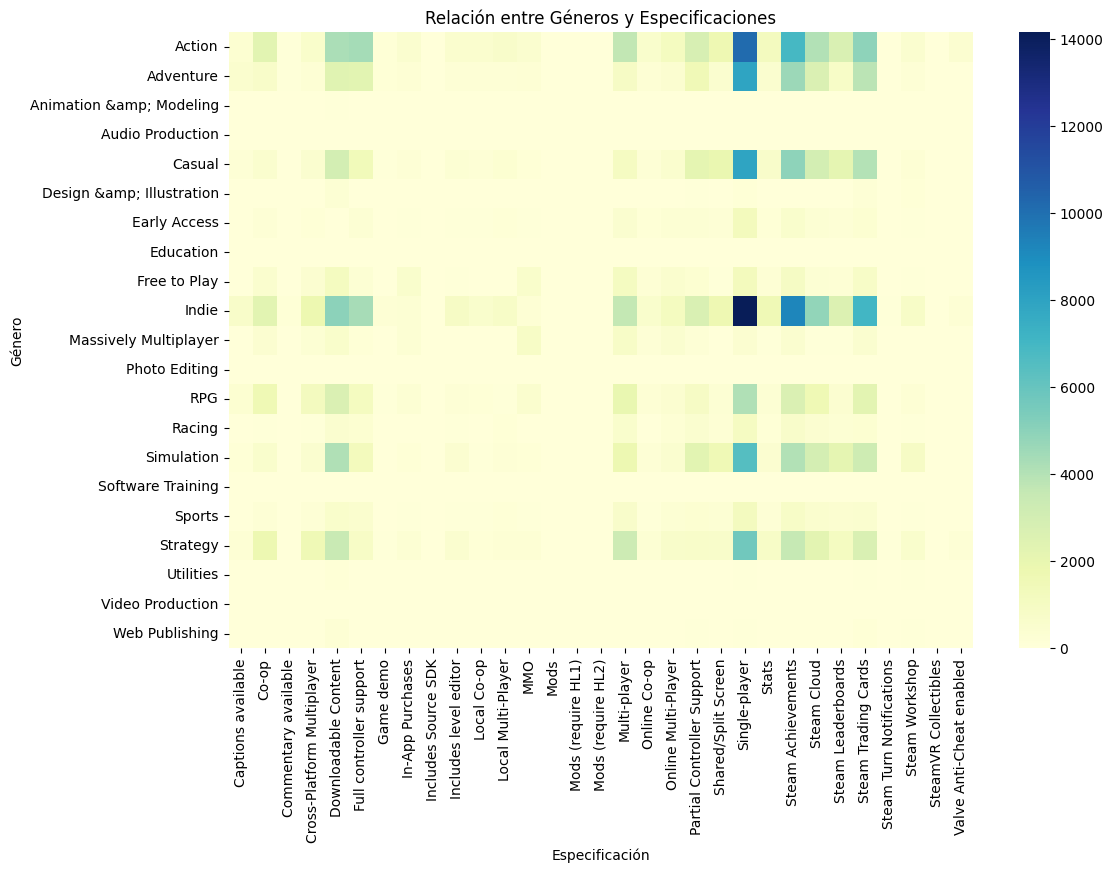

In [61]:

# Contar la cantidad de juegos por género y especificaciones (specs)
genre_specs_counts = steam_games.groupby(['genres', 'specs']).size().unstack().fillna(0)

# Establece las dimensiones de visualización del gráfico
plt.figure(figsize=(12, 8))
# Crear un mapa de calor para visualizar la relación
sns.heatmap(genre_specs_counts, cmap="YlGnBu")
# Establece el título del gráfico
plt.title("Relación entre Géneros y Especificaciones")
# Etiqueta del eje x
plt.xlabel("Especificación")
# Etiqueta del eje y
plt.ylabel("Género")
# Muestra el gráfico
plt.show()

C:\Users\USER\AppData\Local\Temp\ipykernel_10732\3375008148.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='genres', y='price', data=steam_games, ci=None)


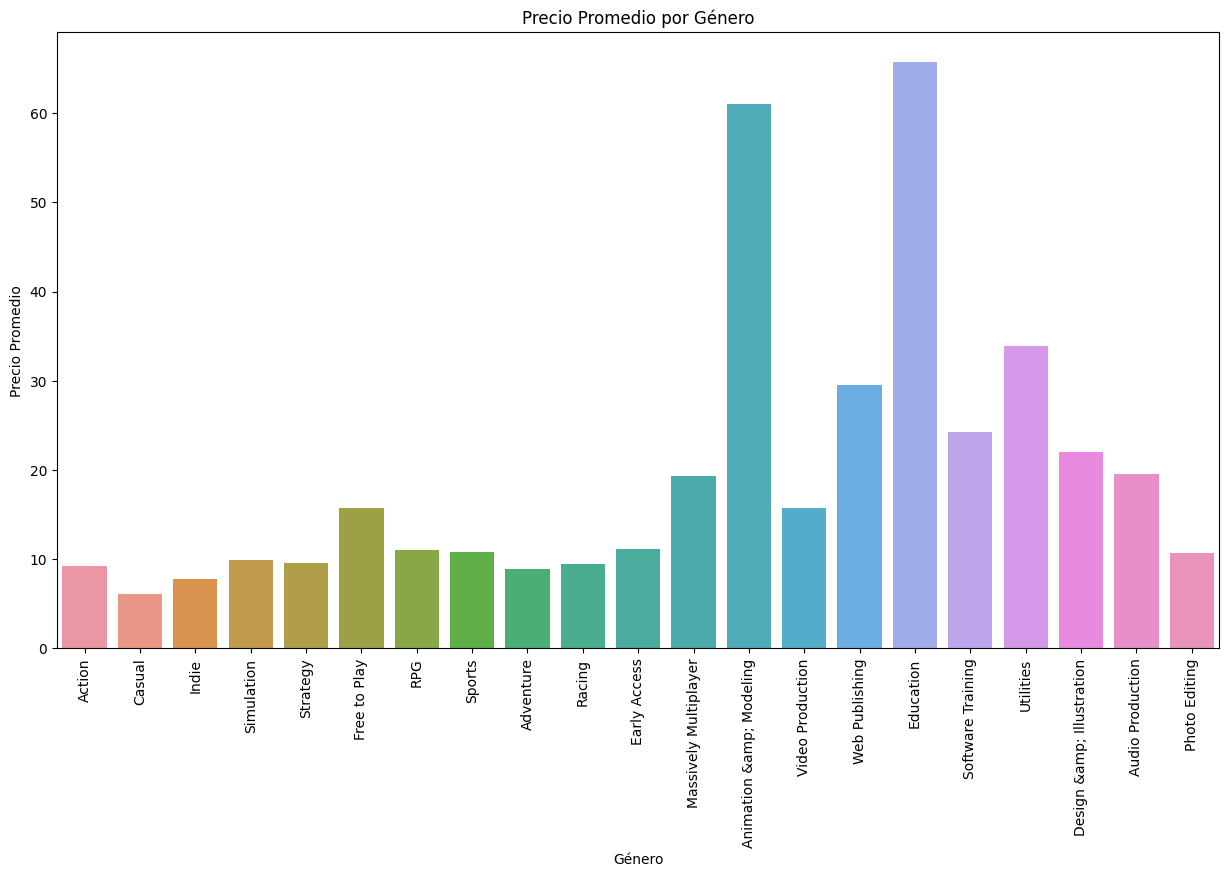

In [62]:
plt.figure(figsize=(15, 8))
sns.barplot(x='genres', y='price', data=steam_games, ci=None)
plt.xticks(rotation=90)
plt.title('Precio Promedio por Género')
plt.xlabel('Género')
plt.ylabel('Precio Promedio')
plt.show()

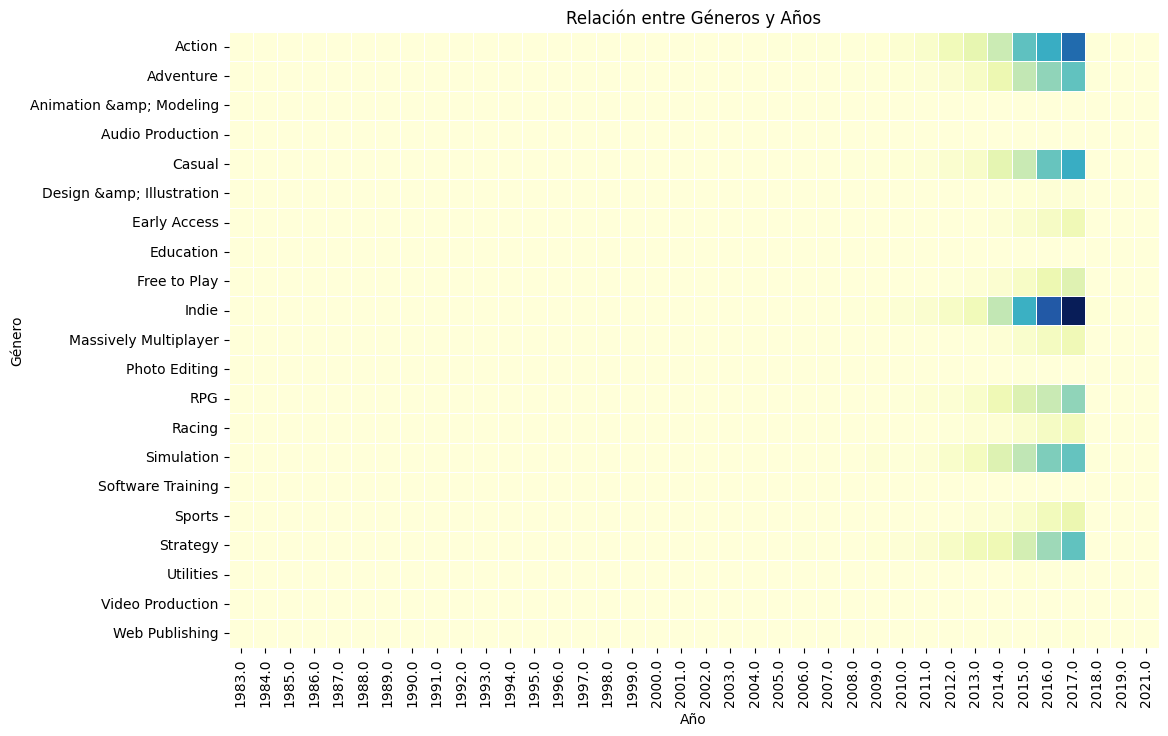

In [63]:
# Extraer el año de la columna 'release_date'
steam_games['release_year'] = pd.to_datetime(steam_games['release_date'], errors='coerce').dt.year

# Contar la cantidad de juegos por género y año
genre_year_counts = steam_games.groupby(['genres', 'release_year']).size().unstack().fillna(0)

# Visualizar la relación con un mapa de calor sin números
plt.figure(figsize=(12, 8))
sns.heatmap(genre_year_counts, cmap="YlGnBu", linewidths=.5, cbar=False)
plt.title("Relación entre Géneros y Años")
plt.xlabel("Año")
plt.ylabel("Género")
plt.show()




In [64]:
users_reviews.columns

Index(['user_id', 'item_id', 'recommend', 'sentiment_analysis', 'posted_year'], dtype='object')

In [65]:
steam_games.columns

Index(['genres', 'title', 'release_date', 'specs', 'price', 'item_id',
       'developer', 'release_year'],
      dtype='object')

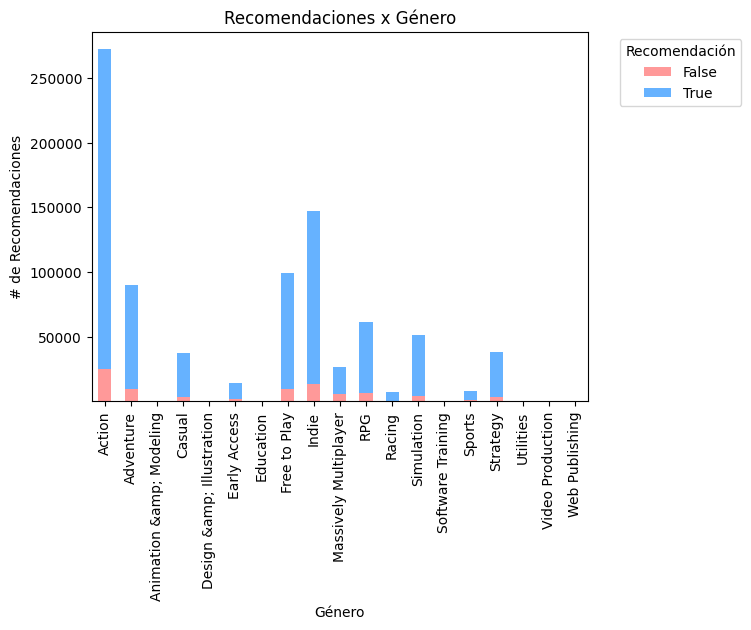

In [71]:
# Convierte 'item_id' a tipo de datos int32 en ambos DataFrames en caso que este como tipo de dato object
steam_games['item_id'] = steam_games['item_id'].astype('int32')
users_reviews['item_id'] = users_reviews['item_id'].astype('int32')

# Combina los dos DataFrame en función del campo 'item_id'
merged_data = pd.merge(steam_games, users_reviews, on='item_id')

# Calcula la cantidad de recommend (True/False) por género
recommend_by_genre = merged_data.groupby(['genres', 'recommend']).size().unstack().fillna(0)

# Define colores personalizados
colors = ["#FF9999", "#66B2FF"]

# Crea un gráfico de barras apiladas con colores personalizados
recommend_by_genre.plot(kind='bar', stacked=True, color=colors)

# Establece el título del gráfico
plt.title("Recomendaciones x Género")

# Etiqueta del eje x
plt.xlabel("Género")

# Etiqueta del eje y
plt.ylabel("# de Recomendaciones")

# Agrega una leyenda al gráfico con título y etiquetas personalizadas
plt.legend(title="Recomendación", labels=["False", "True"], bbox_to_anchor=(1.05, 1), loc='upper left')

# Muestra el gráfico
plt.show()



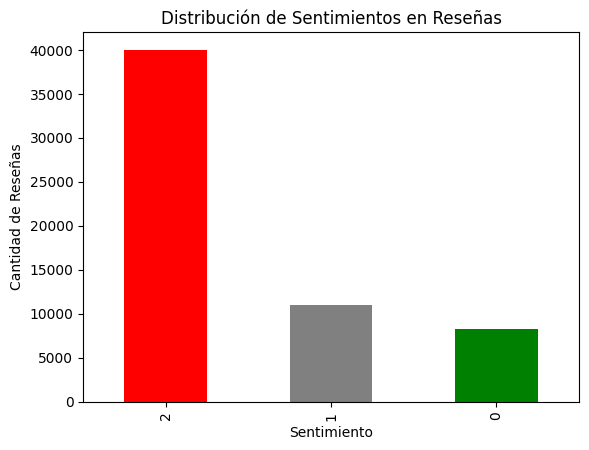

In [72]:
# Calcula la distribución de sentimientos
sentiment_distribution = users_reviews['sentiment_analysis'].value_counts()

# Crea un gráfico de barras
sentiment_distribution.plot(kind='bar', color=['red', 'gray', 'green'])
plt.title("Distribución de Sentimientos en Reseñas")
plt.xlabel("Sentimiento")
plt.ylabel("Cantidad de Reseñas")
plt.show()


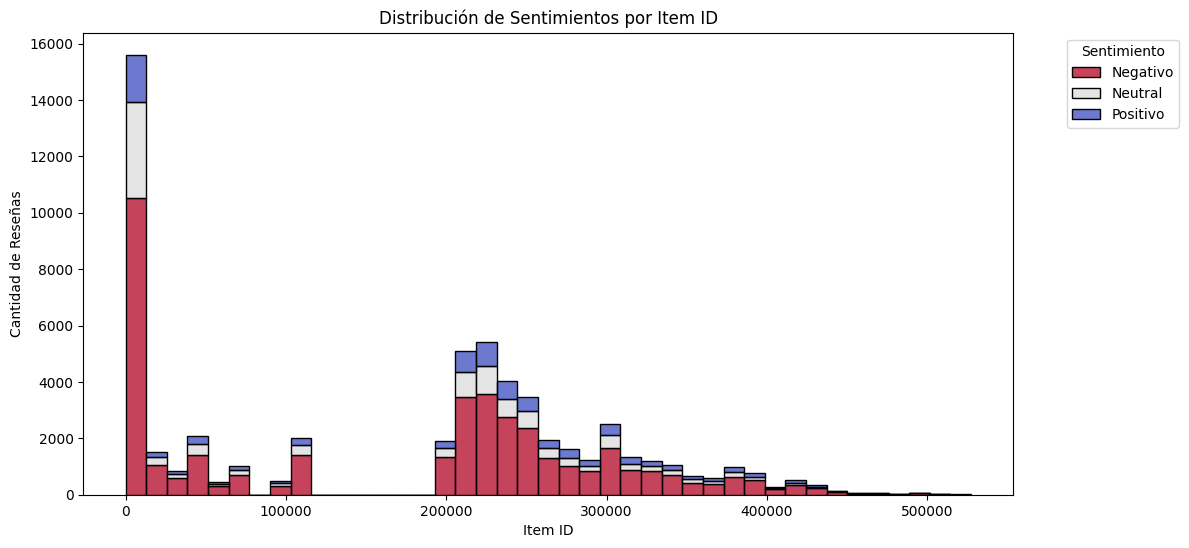

In [74]:
# Crea un histograma de sentimientos
plt.figure(figsize=(12, 6))
sns.histplot(users_reviews, x='item_id', hue='sentiment_analysis', multiple='stack', palette='coolwarm')
plt.title("Distribución de Sentimientos por Item ID")
plt.xlabel("Item ID")
plt.ylabel("Cantidad de Reseñas")
plt.legend(title="Sentimiento", labels=["Negativo", "Neutral", "Positivo"], bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()



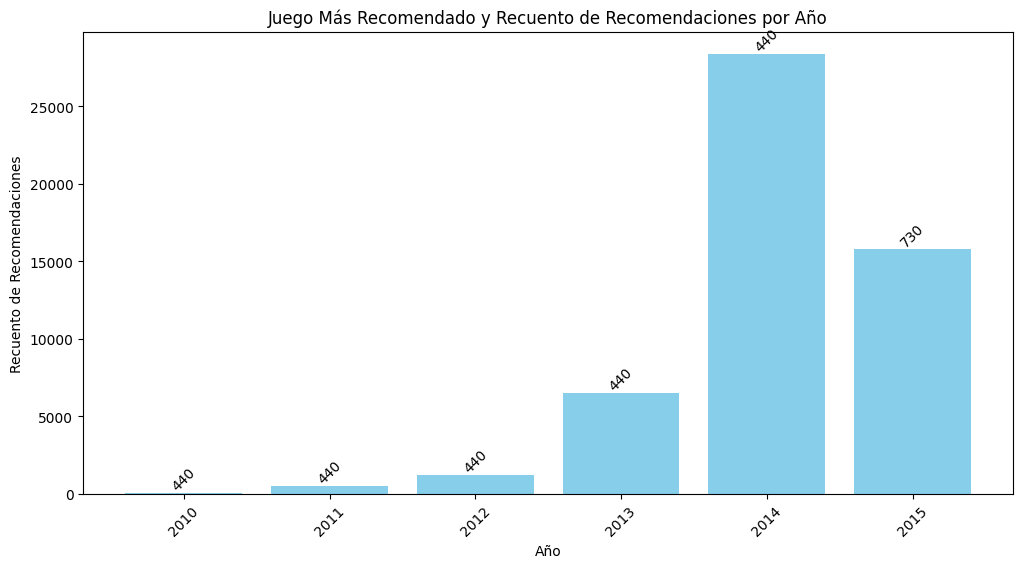

In [76]:
# Filtrar las reseñas con recomendaciones (True)
recommended_reviews = users_reviews[users_reviews['recommend']]

# Encontrar el juego más recomendado y su recuento para cada año
most_recommended_games_by_year = recommended_reviews.groupby('posted_year')['item_id'].agg(
    [lambda x: x.value_counts().idxmax(), 'count']).reset_index()
most_recommended_games_by_year.columns = ['posted_year', 'most_recommended_game', 'recommend_count']

# Fusionar los DataFrames para obtener el nombre del juego
recommended_reviews_with_names = recommended_reviews.merge(steam_games, on='item_id')

# Crea un gráfico de barras apiladas
plt.figure(figsize=(12, 6))
plt.bar(most_recommended_games_by_year['posted_year'], most_recommended_games_by_year['recommend_count'], color='skyblue')
# Etiqueta del eje x
plt.xlabel("Año")
# Etiqueta del eje y
plt.ylabel("Recuento de Recomendaciones")
# Establece el título del gráfico
plt.title("Juego Más Recomendado y Recuento de Recomendaciones por Año")
plt.xticks(rotation=45)

# Etiquetas de datos en las barras
for i, row in most_recommended_games_by_year.iterrows():
    plt.text(row['posted_year'], row['recommend_count'], row['most_recommended_game'], ha='center', va='bottom', rotation=45)
# Muestra el gráfico
plt.show()
